In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv("Train_Airpollution.csv")

In [52]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [53]:
X = df.drop("target",axis=1)
y = pd.DataFrame(df["target"])

In [54]:
X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,0.293416,-0.945599,-0.421105,0.406816,0.525662
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997
2,0.236425,0.132836,-0.147723,0.699854,-0.187364
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077


In [55]:
y.head()

,target
0,-82.154667
1,-48.897960
2,77.270371
3,-2.988581
4,-37.596722


In [56]:
X = X.values

In [57]:
u = np.mean(X,axis=0)
std = np.std(X,axis=0)

In [58]:
# Normalize the data
X = (X-u)/std

In [59]:
print(u.shape)
y = y.values

(5,)


In [60]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)
print(X[0,0])
y = y.reshape((-1,))

(1600, 6)
1.0


In [61]:
# Linear Regression
def hypothesis(X,theta):
    y_ = np.dot(X,theta)
    return y_

def error(X,y,theta):
    error = 0.0
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    error = np.sum((y_ - y)**2)

    return error/m

def gradient(X,y,theta):
    grad = np.zeros((X.shape[1],))
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_- y))

    return grad/X.shape[0]

def gradient_descent(X,y,learning_rate=0.1,max_steps=300):
    theta = np.zeros((X.shape[1],))
    error_list =[]

    for i in range(max_steps):
        error_list.append(error(X,y,theta))

        # gradient descent
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad

    return theta,error_list


In [62]:
theta,error_list = gradient_descent(X,y)

In [63]:
theta

array([ 0.31883538, 29.59359198, 94.65067706,  8.37544469, 45.52303635,
        2.46461552])

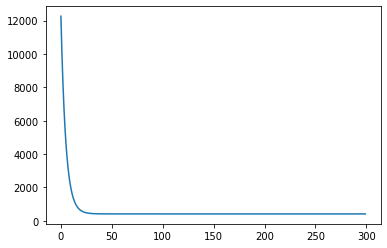

In [64]:
plt.plot(error_list)

In [68]:
X_test = pd.read_csv('Test_Air pollution.csv').values

In [69]:
ones = np.ones((X_test.shape[0],1))
X_test = np.hstack((ones,X_test))
y_ = pd.DataFrame(hypothesis(X_test,theta))

In [71]:
y_.to_csv('Ans_Air.csv')